In [16]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from PIL import Image
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu từ tệp CSV
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
print(data.head()) 



     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 785 columns]


In [17]:
# Hiển thị thông tin cơ bản về dữ liệu
print("Thông tin cơ bản về dữ liệu:")
print(data.info())

Thông tin cơ bản về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB
None


In [18]:
# Hiển thị 5 hàng đầu tiên của dữ liệu
print("\n5 hàng đầu tiên của dữ liệu:")
print(data.head())


5 hàng đầu tiên của dữ liệu:
     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 785 columns]


In [19]:
# Kiểm tra các class và số lượng tương ứng
print("\nSố lượng các mẫu dữ liệu cho từng lớp (class):")
print(data['0'].value_counts())


Số lượng các mẫu dữ liệu cho từng lớp (class):
0
14.0    57825
18.0    48419
20.0    29008
2.0     23409
19.0    22495
15.0    19341
13.0    19010
0.0     13869
12.0    12336
11.0    11586
17.0    11566
4.0     11440
24.0    10859
22.0    10784
3.0     10134
1.0      8668
9.0      8493
7.0      7218
23.0     6272
25.0     6076
16.0     5812
6.0      5762
10.0     5603
21.0     4182
5.0      1163
8.0      1120
Name: count, dtype: int64


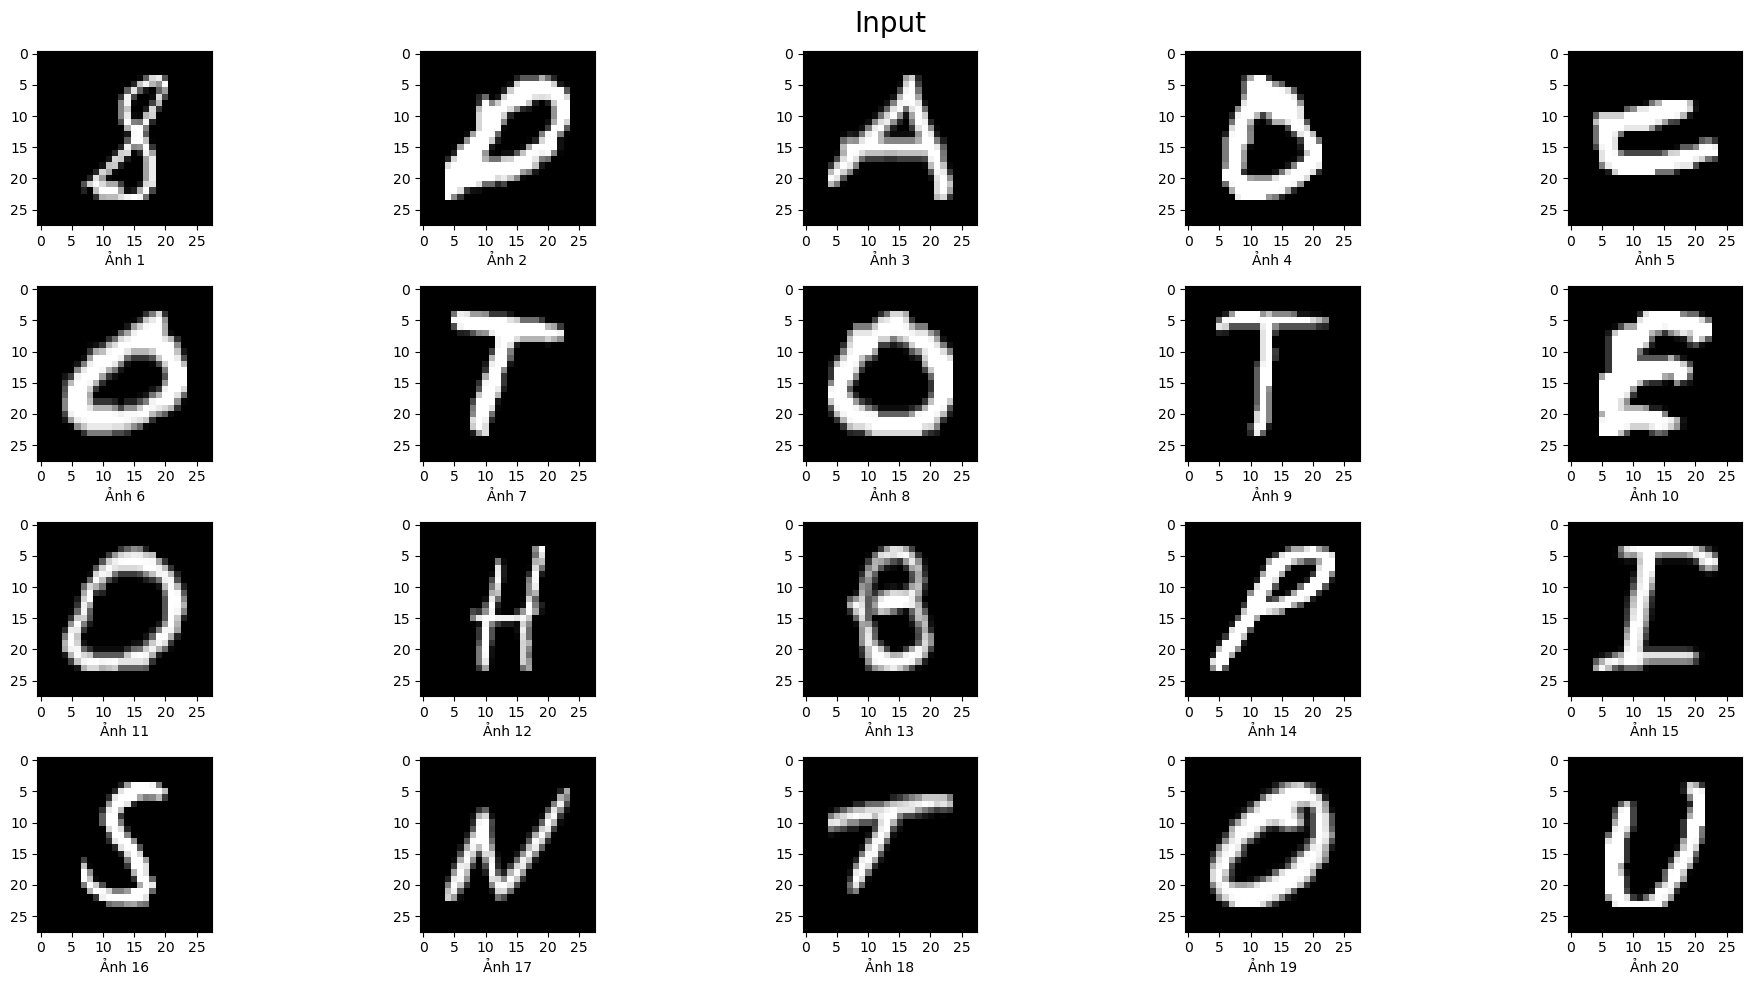

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Chọn số lượng ảnh ngẫu nhiên bạn muốn hiển thị
num_images = 20

# Chọn ngẫu nhiên các hàng từ dataframe
random_indices = np.random.randint(0, len(data), num_images)
random_images = data.iloc[random_indices, 1:].values.reshape(-1, 28, 28)

# Hiển thị các hình ảnh ngẫu nhiên với trục số
plt.figure(figsize=(20, 10))
for i in range(num_images):
    plt.subplot(4, 5, i + 1)  # Dãn hình ảnh sang 4 hàng và 5 cột
    plt.imshow(random_images[i], cmap='gray')
    plt.axis('on')  # Bật trục
    plt.xticks(np.arange(0, 28, 5))  # Thiết lập các giá trị trên trục x
    plt.yticks(np.arange(0, 28, 5))  # Thiết lập các giá trị trên trục y
    plt.xlabel(f'Ảnh {i+1}')  # Gắn nhãn cho mỗi hình ảnh
plt.suptitle('Input', fontsize=20)
plt.tight_layout()
plt.show()


In [21]:
#Tiền xử lý dữ liệu 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Tách dữ liệu thành ảnh và nhãn
X = data.drop('0', axis=1).values
y = data['0'].values


X = X.reshape(-1, 28, 28, 1)

# Chuẩn hóa dữ liệu
X = X / 255.0

# Chuyển đổi nhãn thành one-hot encoding
y = to_categorical(y, num_classes=26)

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
#RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import numpy as np

# Chuyển danh sách các ảnh đã tiền xử lý thành mảng numpy
X_train = np.array(X_train)
X_test = np.array(X_test)
# Tiếp tục xây dựng mô hình RNN...

# Khởi tạo mô hình
rnn_model = Sequential()

# Thêm lớp LSTM
rnn_model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))

# Thêm lớp fully connected (Dense)
rnn_model.add(Dense(26, activation='softmax'))  # 26 classes for letters A-Z

# Compile model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Hiển thị cấu trúc mô hình
rnn_model.summary()

# Huấn luyện mô hình
rnn_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))



# Đánh giá mô hình trên tập dữ liệu kiểm tra
loss, accuracy = rnn_model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")



C:\Users\tramy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 128)                 │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,738 (327.10 KB)

 Trainable params: 83,738 (327.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 140s 15ms/step - accuracy: 0.8574 - loss: 0.4981 - val_accuracy: 0.9716 - val_loss: 0.1002
Epoch 2/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 131s 14ms/step - accuracy: 0.9742 - loss: 0.0884 - val_accuracy: 0.9807 - val_loss: 0.0684
Epoch 3/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 133s 14ms/step - accuracy: 0.9823 - loss: 0.0607 - val_accuracy: 0.9825 - val_loss: 0.0640
Epoch 4/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 125s 13ms/step - accuracy: 0.9858 - loss: 0.0483 - val_accuracy: 0.9858 - val_loss: 0.0503
Epoch 5/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 134s 14ms/step - accuracy: 0.9883 - loss: 0.0390 - val_accuracy: 0.9866 - val_loss: 0.0494
Epoch 6/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 150s 16ms/step - accuracy: 0.9903 - loss: 0.0321 - val_accuracy: 0.9878 - val_loss: 0.0439
Epoch 7/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 134s 14ms/step - accuracy: 0.9911 - loss: 0.0287 - val_accuracy: 0.9892 - val_loss: 0.0382
Epoch 8/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 143s 15ms/step - accuracy: 

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Giả sử y_test là nhãn thực tế và rnn_model.predict(X_test) là dự đoán của mô hình

# Chuyển đổi dự đoán từ xác suất sang nhãn lớp
y_pred_prob = rnn_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)  # Giả sử y_test là one-hot encoded

# In báo cáo phân loại
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=[chr(i) for i in range(65, 91)]))  # 'A'-'Z'

# In ma trận nhầm lẫn
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


2328/2328 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           A       0.99      0.99      0.99      2806
           B       0.99      0.99      0.99      1673
           C       0.99      0.99      0.99      4742
           D       0.97      0.97      0.97      2044
           E       0.99      0.99      0.99      2214
           F       0.97      0.99      0.98       231
           G       0.98      0.98      0.98      1183
           H       0.98      0.99      0.99      1466
           I       0.99      0.97      0.98       237
           J       0.98      0.99      0.98      1668
           K       0.98      0.98      0.98      1132
           L       0.99      0.98      0.99      2319
           M       0.99      0.99      0.99      2487
           N       0.99      0.99      0.99      3756
           O       0.99      1.00      0.99     11629
           P       1.00      0.99      0.99      3868
           Q  

In [24]:
from tensorflow.keras.saving import save_model
from tensorflow.keras.models import load_model

save_model(rnn_model, 'rnn_model.keras')

# Đường dẫn đến file mô hình đã lưu
model_path = 'rnn_model.keras'

# Load mô hình từ file đã lưu
loaded_model = load_model(model_path)

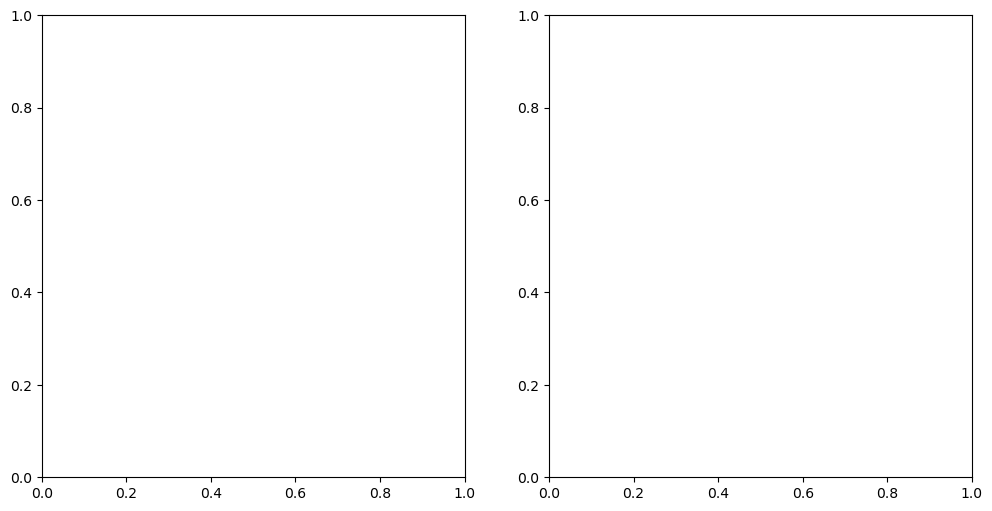

In [25]:
# Vẽ biểu đồ mất mát và độ chính xác
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

In [30]:
# Biểu đồ mất mát
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss Over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

In [31]:
# Biểu đồ độ chính xác
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy Over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

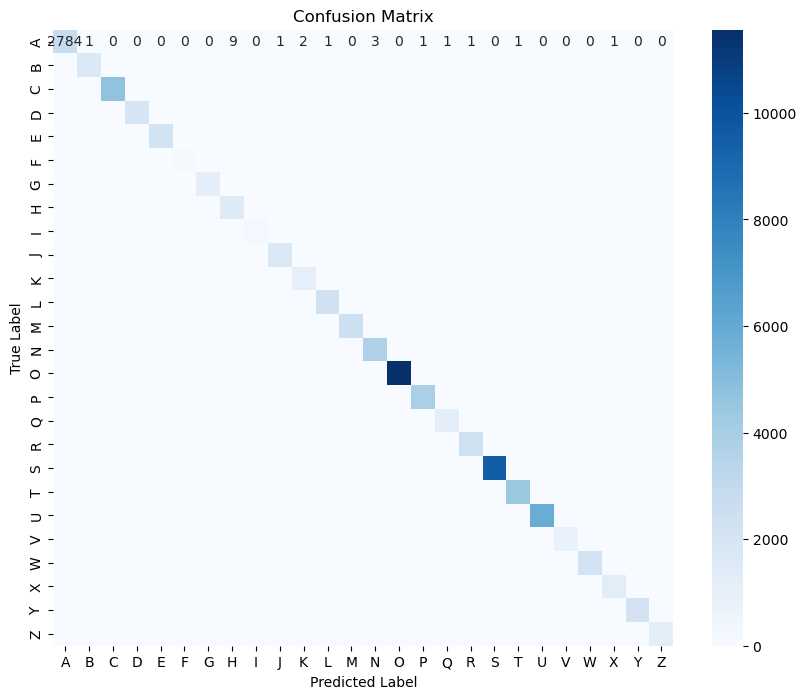

In [28]:
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[chr(i) for i in range(65, 91)], yticklabels=[chr(i) for i in range(65, 91)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()